# **Lab 3: Approximation**
**Christian Weigelt**

#***About the code*** 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Christian Weigelt (weigelt@kth.se)

# This file is part of the course DD2363 DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Abstract**

This lab consisted of implementing an approximation algorithm.
  
  Test code was written to verify function outputs and convergence of the algorithm.
  
  In the introduction section, the function is given a brief description, both of input/output, and what is to be tested.
  
  In the method section, short definitions of the functions are given, and their respective implementation and test function is presented.
  
  In the results section, the output of the test cases are presented.

# **Set up environment**

In [ ]:
import numpy as np
import scipy.integrate as integrate
import math
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**

In this lab, the assignment was to implement one function, with input and output as defined in the lab instructions, as well as write code tests to test output.
  
1. Function: $L_2$ projection to pw linear approximation over mesh in 1D

  Input: function $f(x)$, 1D mesh with nodes $(x_0,...,x_n)$
 
  Output: vector of $L_2$ projection of $f(x)$ evaluated in $(x_0,...,x_n)$ 
 
  Test: verify accuracy and convergence rate against exact function

# **Method**

Here the code for the assignment is provided.

###$L_2$ projection to pw linear approximation over mesh in 1D
  Function 1 is '$L_2$ projection to piecewise linear approximation over mesh in 1D'

  The implementation follows the algorithm outlined in Algorithm 9.2 in the course book. 

  For a 1D-mesh, the number of local shape functions is 2, so 1 is set accordingly

`integrate_vector()` and `integrate_matrix()` is implemented as shown in example 9.9 in the course book:

  $a^{k}_{ij} = ∫_{I_{k}}λ_{k,j}(x)λ_{k,i}(x) dx$
  
  $b^{k}_{i} = ∫_{I_{k}}f(x)λ_{k,i}(x) dx$

  After assembling the output matrix $A$ and vector $b$, `np.linalg.solve()` is used to compute the solution $\alpha$.

  For testing, we will check the results of the projection over 1D-meshes of increasing resolution, and for each resolution a plot will be presented. Also, the average error at each resolution will be plotted. The convergence rate will also be plotted.

In [ ]:
def l2_integrate_vector(f, k, i, mesh):
  # interval length
  h_k = mesh[k + 1] - mesh[k]
  # define local shape functions
  lam = [(lambda x: (mesh[k + 1] - x) / h_k),
         (lambda x: (x - mesh[k]) / h_k)]
  # return value depending on value of i, integrate over interval
  return integrate.quad(lambda x: f(x) * lam[i](x), mesh[k], mesh[k + 1])

def l2_integrate_matrix(k, i, j, mesh):
  # interval length
  h_k = mesh[k + 1] - mesh[k]
  # define local shape functions
  lam = [(lambda x: (mesh[k + 1] - x) / h_k),
         (lambda x: (x - mesh[k]) / h_k)]
  # return value depending on value of i and j, integrate over interval
  return integrate.quad(lambda x: lam[i](x) * lam[j](x), mesh[k], mesh[k + 1])

def l2_assemble_system(f, mesh):
  # init output matrix A, and output vector b
  n = len(mesh)
  A = np.zeros((n, n))
  b = np.zeros(n)
  for k in range(n - 1):
    # init inner containers
    q = 2 # 1D-mesh, 2 local shape functions
    inner_A = np.zeros((q, q))
    inner_b = np.zeros(q)
    for i in range(q):
      # integrate, use mesh directly
      inner_b[i] = l2_integrate_vector(f, k, i, mesh)[0]
      for j in range(q):
        inner_A[i, j] = l2_integrate_matrix(k, i, j, mesh)[0]
    # save inner result to output
    # no need to translate between local/global
    A[k:(k+q), k:(k+q)] += inner_A
    b[k:(k+q)] += inner_b
  return A, b

def l2_projection(f, mesh):
  # assemble system
  A, b = l2_assemble_system(f, mesh)
  # return projection by calling linalg.solve()
  return np.linalg.solve(A, b)

To test the above code, we can run the following test function:

In [ ]:
def l2_test():
  from numpy import pi, sin, cos
  
  def f(x):
    return cos((1/3)*pi + x) + sin(2*x)**2
  print(f"Test l2 projection for f(x) = cos((1/3)*pi + x) + sin(2*x)^2\n")

  # base interval to compare projection to f(x) on
  x = np.linspace(-5, 5, 100)

  # init arrays for plotting convergence
  intervals = [2**i for i in range(2, 8)] # 4, 8, 16, 32, 64, 128
  errors = []

  for i in intervals:
    mesh = np.linspace(-5, 5, i + 1)
    proj_alpha = l2_projection(f, mesh)
    avg_error = 0
    for k in range(len(mesh)):
      avg_error += abs(f(mesh[k]) - proj_alpha[k])
    avg_error = avg_error / len(mesh)
    errors.append(avg_error)
    plt.title(f"{i} intervals, average error: {avg_error:.4f}")
    plt.plot(x, f(x))
    plt.plot(mesh, proj_alpha)
    plt.show()
  
  plt.title("Plot of average error for l2 projection:")
  plt.plot(intervals, errors)
  plt.ylabel("avg_error")
  plt.xlabel("no. of intervals")
  plt.xticks(intervals)
  for i in range(len(intervals)):
    plt.text(intervals[i], errors[i], f"{errors[i]:.4f}")
  plt.show()

  plt.title("Convergence rate")
  c_rs = [errors[i+1]/errors[i] for i in range(len(errors) - 1)]
  c_rs_x = range(1, len(c_rs)+1)
  plt.plot(c_rs_x, c_rs)
  plt.xticks(ticks=c_rs_x, labels=["4-8", "8-16", "16-32", "32-64", "64-128"])
  for i in range(len(c_rs)):
    plt.text(c_rs_x[i], c_rs[i], f"{c_rs[i]:.4f}")
  plt.show()

# **Results**

Running the test cases here in google colab, after importing required libraries, defining all functions, etc., generates the following output:

Test l2 projection for f(x) = cos((1/3)*pi + x) + sin(2*x)^2



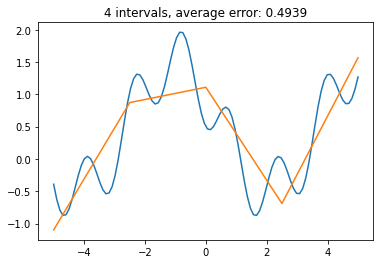

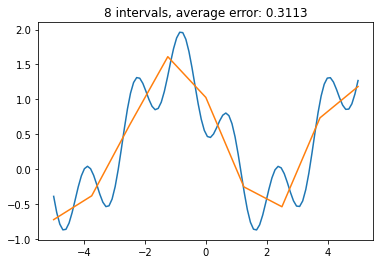

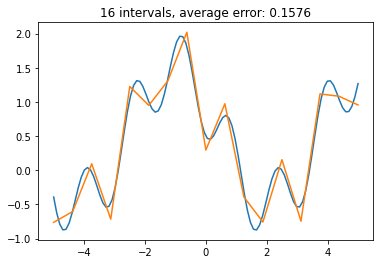

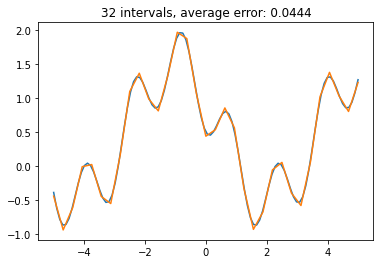

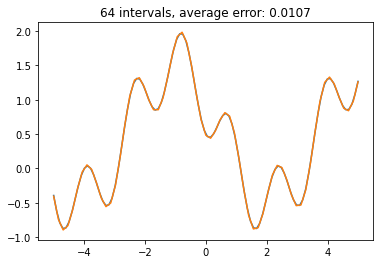

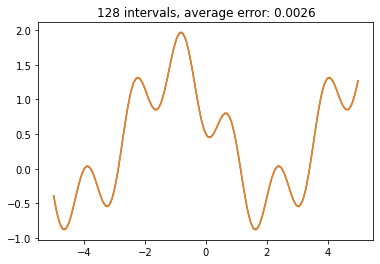

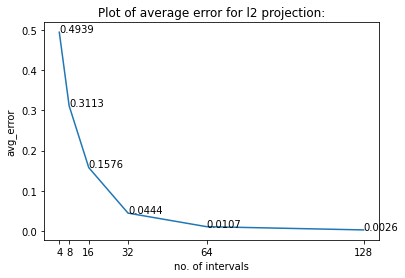

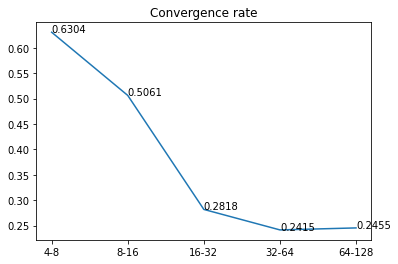

In [ ]:
l2_test()

From which we can see that as the mesh resolution increases, the projection more closely approximates the function $f$.

# **Discussion**

  The $L_2$-approximation produces nice results quickly on coarse meshes. In the test we can see that as convergence rate approaches a value around 0.2415~0.2455.
  
  Implementing this assignment was a bit of a challenge to me. While the algorithm is not very complex, understanding exactly how the algorithm works on a conceptual level was hard for me.

  I did not implement the extra assignments, as I could not figure out exactly how I was supposed to formulate the problem and test cases, as well as appropriately extend the implementation to solve the assignment.